In [6]:
import pandas as pd

data = {
    'Country': ['Afghanistan','Afghanistan','Afghanistan','Afghanistan','Brazil','Brazil','Brazil','Brazil','China','China','China','China'],
    'Year': [ 1999, 1999, 2000,2000,1999,1999,2000,2000,1999,1999,2000,2000],
    'Key':['Cases','Population','Cases','Population','Cases','Population','Cases','Population','Cases','Population','Cases','Population'],
    'Value':[745,19987071,2666,20595360,37737,172006362,80488,174504898,212258,1272915272,213766,1280428583]
}

messy = pd.DataFrame(data,columns = ['Country','Year','Key','Value'])
messy

,Country,Year,Key,Value
0,Afghanistan,1999,Cases,745
1,Afghanistan,1999,Population,19987071
2,Afghanistan,2000,Cases,2666
3,Afghanistan,2000,Population,20595360
4,Brazil,1999,Cases,37737
5,Brazil,1999,Population,172006362
6,Brazil,2000,Cases,80488
7,Brazil,2000,Population,174504898
8,China,1999,Cases,212258
9,China,1999,Population,1272915272


In [10]:
#To convert rows into columts of data, use pivot_table

#pivot table - iikot yung datas yung country and year naka constant, while key and value yung pagpapalitin
tidy = messy.pivot_table(index= ['Country','Year'], columns = 'Key' , values = 'Value').reset_index()
tidy

Key,Country,Year,Cases,Population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [11]:
tidy.loc[5,'Cases'] #5 is row, column ay cases

213766

In [14]:
tidy.loc[2,'Cases']/tidy.loc[2,'Population']

0.00021939304779901105

In [16]:
#New dataframe (mas malinis compared sa 1st na dataframe)

data = {
    'Student':['Ice Bear', 'Panda', 'Grizzly'],
    '2014':[80, 95 ,79],
    '2015': [85,81,83]
}

webarebears = pd.DataFrame(data,columns = ['Student','2014','2015'])
webarebears

,Student,2014,2015
0,Ice Bear,80,85
1,Panda,95,81
2,Grizzly,79,83


In [17]:
#Convert columns into rows, use melt
pd.melt(webarebears, id_vars = ['Student'], value_vars = ['2014', '2015'], var_name = 'Year',
        value_name = 'Grades').sort_values(by='Student').reset_index(drop=True)

,Student,Year,Grades
0,Grizzly,2014,79
1,Grizzly,2015,83
2,Ice Bear,2014,80
3,Ice Bear,2015,85
4,Panda,2014,95
5,Panda,2015,81


In [18]:
#New demo

df=pd.read_csv('board.csv')
df

,student name,Math,Electronics,GEAS,Communication
0,Student1,98,78,86,90
1,Student2,91,77,90,85
2,Student3,71,83,78,84
3,Student4,63,56,83,83
4,Student5,55,94,89,82
5,Student6,90,57,70,81
6,Student7,88,90,88,76
7,Student8,54,49,78,77
8,Student9,32,45,88,41
9,Student10,90,86,90,89


In [19]:
df.describe()

,Math,Electronics,GEAS,Communication
count,15.000000,15.000000,15.000000,15.000000
mean,71.666667,71.066667,80.000000,78.600000
std,20.328259,18.257940,11.263088,12.971397
min,32.000000,43.000000,50.000000,41.000000
25%,56.500000,56.500000,76.000000,77.000000
50%,71.000000,77.000000,83.000000,82.000000
75%,89.500000,88.000000,88.500000,84.500000
max,98.000000,94.000000,90.000000,93.000000


In [21]:
#students whose math grades are above 70
df.loc[(df['Math']>70)]

,student name,Math,Electronics,GEAS,Communication
0,Student1,98,78,86,90
1,Student2,91,77,90,85
2,Student3,71,83,78,84
5,Student6,90,57,70,81
6,Student7,88,90,88,76
9,Student10,90,86,90,89
11,Student12,88,90,89,93
14,Student15,89,91,81,84


In [23]:
df.loc[(df['Math']>70)&(df['Electronics']>70)&(df['GEAS']>70)&(df['Communication']>70)]

,student name,Math,Electronics,GEAS,Communication
0,Student1,98,78,86,90
1,Student2,91,77,90,85
2,Student3,71,83,78,84
6,Student7,88,90,88,76
9,Student10,90,86,90,89
11,Student12,88,90,89,93
14,Student15,89,91,81,84


In [24]:
x = df [(df['Math']<70)&(df['Math']>60)&
        (df['Electronics']<70)&(df['Electronics']>60)&
        (df['GEAS']<70)& (df['GEAS']>60)&
        (df['Communication']< 70)& (df ['Communication']>60)]
x

,student name,Math,Electronics,GEAS,Communication


<BarContainer object of 15 artists>

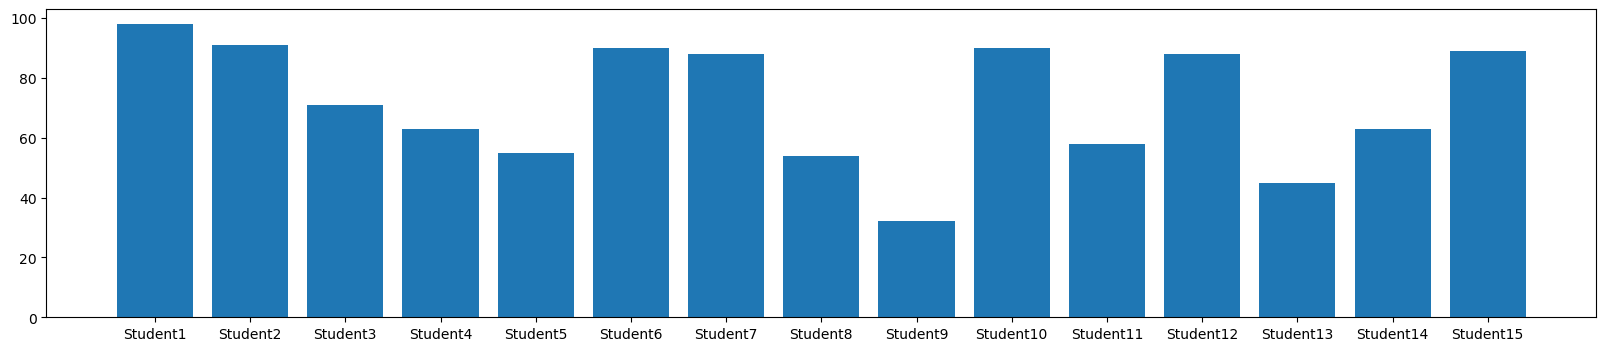

In [28]:
import matplotlib.pyplot as plt #library for plotting

plt.figure(figsize=(20,4))
plt.bar(df['student name'],df['Math']) #bargraph

<Axes: ylabel='Frequency'>

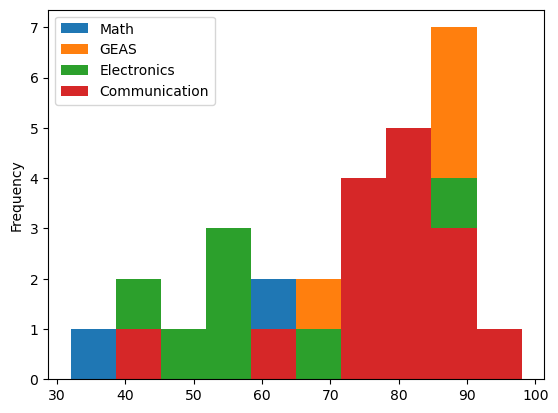

In [29]:
df.plot.hist(x='student name', y=['Math', 'GEAS', 'Electronics', 'Communication']) #histograph